In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
submit = pd.read_csv('dataset/submit.csv')

In [5]:
# Merge test and submit
test_df = pd.merge(test, submit, on='id', how='left')

# Filling NaN values in specific columns
train['title'].fillna('Untitled', inplace=True)
train['author'].fillna('unknown', inplace=True)

# Dropping rows with NaN values in the 'text' column
train.dropna(subset=['text'], inplace=True)

# Combine text features
train['combined'] = train['title'].astype(str) + ' ' + train['author'].astype(str) + ' ' + train['text'].astype(str)


/tmp/ipykernel_38251/3295832884.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['title'].fillna('Untitled', inplace=True)
/tmp/ipykernel_38251/3295832884.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [6]:
# TF-IDF Vectorization
tdf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.85, min_df=0.01)
X = tdf.fit_transform(train['combined'])
y = train['label']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


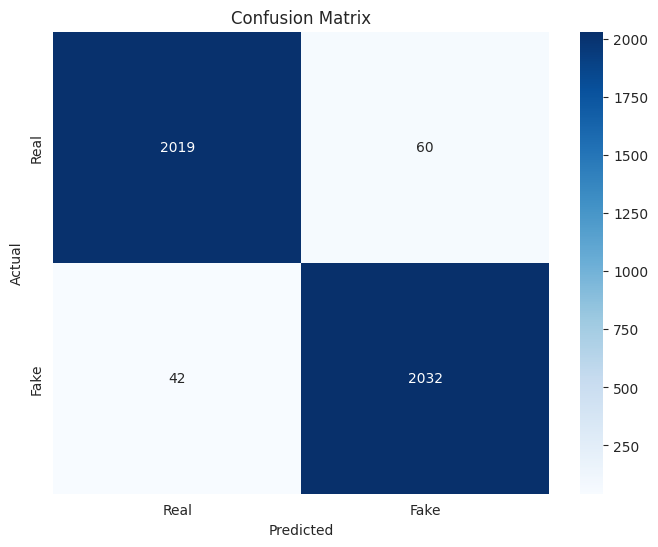

In [12]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()